# Load and process

In [97]:
##Load libraries
import pandas as pd
import geopandas as gp
import requests as r
import missingno as mgno
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

In [25]:
##Load October 2015 data
data_2015 = pd.read_csv('data/oct_2015_ov_data.csv',low_memory=False)
##Load October 2017 data
data_2017 = pd.read_sql('data',con='sqlite:///data/oct_2017_ov_data_product.sqlite')
##Add in snapshot date
data_2015['date_snapshot'] = pd.to_datetime('2015-10-31')
data_2017['date_snapshot'] = pd.to_datetime('2017-10-1')
##Combine files into a single dataframe
data = pd.concat([data_2015,data_2017])
##Exclude last row which appears to be a summary
data = data[:-1]

In [26]:
##Inspect first few rows of data
data.tail(5)

,Title_Number,Tenure,Property_Address,Price_Paid,District,County,Region,Postcode,Proprietor_Name_1,Company_Registration_No_1,...,Company_Registration_No_4,Proprietorship_4,Country_Incorporated_4,Proprietor_4_Address_1,Proprietor_4_Address_2,Proprietor_4_Address_3,Date_Proprietor_Added,Additional_Proprietor_Indicator,Multiple_Address_Indicator,date_snapshot
99214,AGL401155,Leasehold,"Apartment 2101, Wiverton Tower, 4 New Drum Str...",NaN,TOWER HAMLETS,GREATER LONDON,GREATER LONDON,E1 7AT,GS ALDGATE TRUSTEE 1 LIMITED,None,...,NaN,None,None,None,None,NaN,16-01-2017,N,N,2017-10-01
99215,AGL401163,Leasehold,"Apartment 2207, Wiverton Tower, 4 New Drum Str...",NaN,TOWER HAMLETS,GREATER LONDON,GREATER LONDON,E1 7AT,GS ALDGATE TRUSTEE 1 LIMITED,None,...,NaN,None,None,None,None,NaN,16-01-2017,N,N,2017-10-01
99216,AGL402005,Leasehold,"Flat 41, Goldhawk House, 10 Beaufort Square, L...",NaN,BARNET,GREATER LONDON,GREATER LONDON,NW9 5SQ,NOMURO NOMINEES LIMITED,None,...,NaN,None,None,None,None,NaN,24-01-2017,N,N,2017-10-01
99217,AGL402840,Leasehold,"11, Birkdale House, 18 St Annes Street, London...",390000.0,TOWER HAMLETS,GREATER LONDON,GREATER LONDON,E14 7QB,HAPPY GOAL DEVELOPMENT LTD,None,...,NaN,None,None,None,None,NaN,02-02-2017,N,N,2017-10-01
99218,AGL403429,Leasehold,"Block A, Victoria Wharf, Palmers Road, London ...",NaN,TOWER HAMLETS,GREATER LONDON,GREATER LONDON,E2 0SF,PINEHILL CAPITAL S.A.,None,...,NaN,None,None,None,None,NaN,07-02-2017,N,N,2017-10-01


In [27]:
##Create stacked version of original table which is better for counts
data.columns = ['Title_Number', 'Tenure', 'Property_Address', 'Price_Paid', 'District',\
       'County', 'Region', 'Postcode', '1-Proprietor_Name',\
       '1-Company_Registration', '1-Proprietorship',\
       '1-Country_Incorporated', '1-Proprietor_Address_1',\
       '1-Proprietor_Address_2', '1-Proprietor_Address_3', '2-Proprietor_Name',\
       '2-Company_Registration', '2-Proprietorship',\
       '2-Country_Incorporated', '2-Proprietor_Address_1',\
       '2-Proprietor_Address_2', '2-Proprietor_Address_3', '3-Proprietor_Name',\
       '3-Company_Registration', '3-Proprietorship',\
       '3-Country_Incorporated', '3-Proprietor_Address_1',\
       '3-Proprietor_Address_2', '3-Proprietor_Address_3', '4-Proprietor_Name',\
       '4-Company_Registration', '4-Proprietorship',\
       '4-Country_Incorporated', '4-Proprietor_Address_1',\
       '4-Proprietor_Address_2', '4-Proprietor_Address_3',\
       'Date_Proprietor_Added', 'Additional_Proprietor_Indicator',\
       'Multiple_Address_Indicator','date_snapshot']
data.set_index(['Title_Number', 'Tenure', 'Property_Address', 'Price_Paid', 'District',\
       'County', 'Region', 'Postcode','Date_Proprietor_Added', 'Additional_Proprietor_Indicator',\
       'Multiple_Address_Indicator','date_snapshot'], inplace=True)
tuples = tuple(data.columns.str.split("-"))
tuples = [x[::-1] for x in tuples]
data.columns = pd.MultiIndex.from_tuples(tuples)
data = data.stack(level = 1).reset_index(level = 1, drop = True).reset_index()
data.rename(columns={'level_11': 'Proprietor_Number'},inplace=True)
data.set_index('date_snapshot',inplace=True)

In [73]:
##Create a pseudo unique column for companies which is a combination of first line of address and name. May
##want to bottom this out a bit more
data['Proprietor_Address_1'] = data['Proprietor_Address_1'].fillna('')
data['Proprietor_Name'] = data['Proprietor_Name'].fillna('')
data['unique_company'] = data['Proprietor_Name'] + data['Proprietor_Address_1']

In [30]:
##Size of dataset
print(data.shape)

(208353, 18)


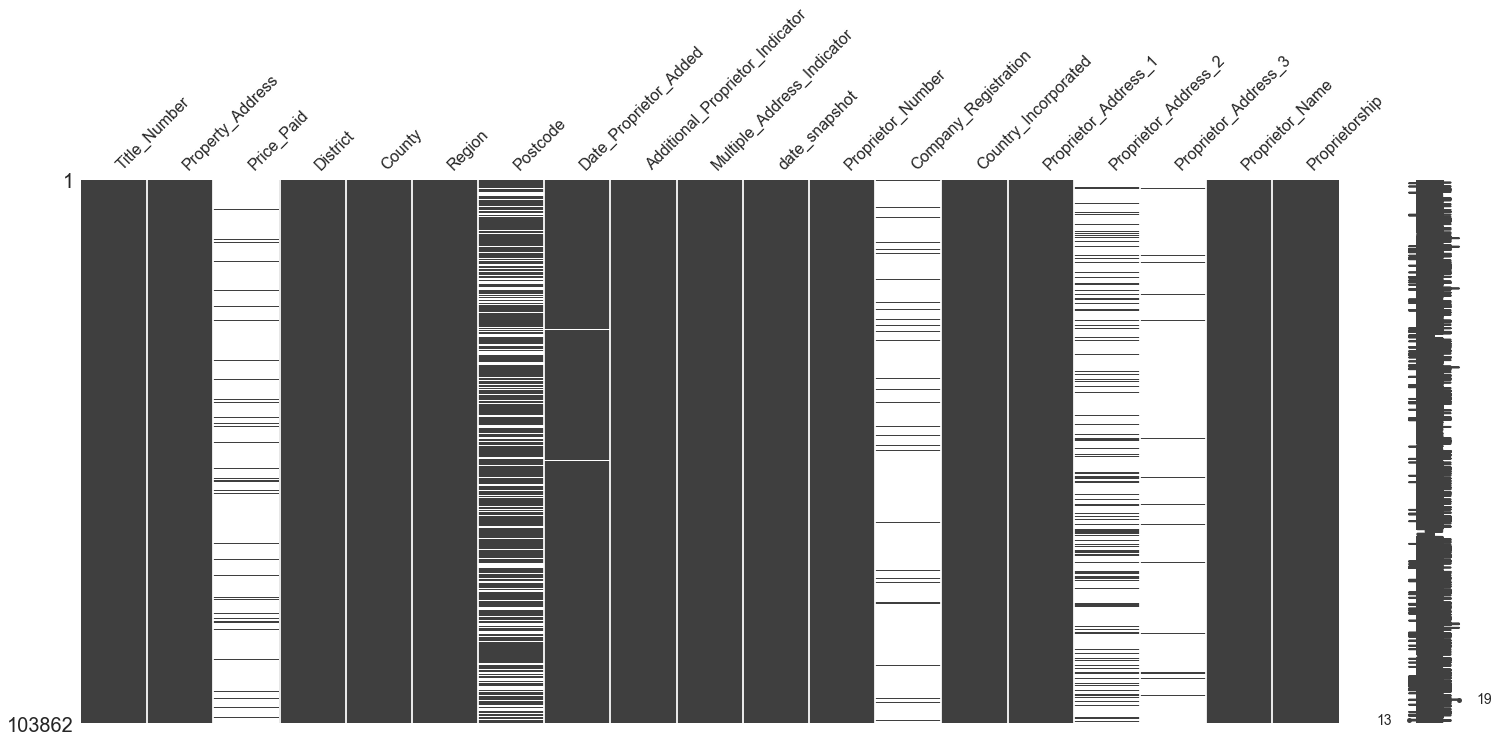

In [52]:
##Look at how well filled out fields are
mgno.matrix(data_2015)

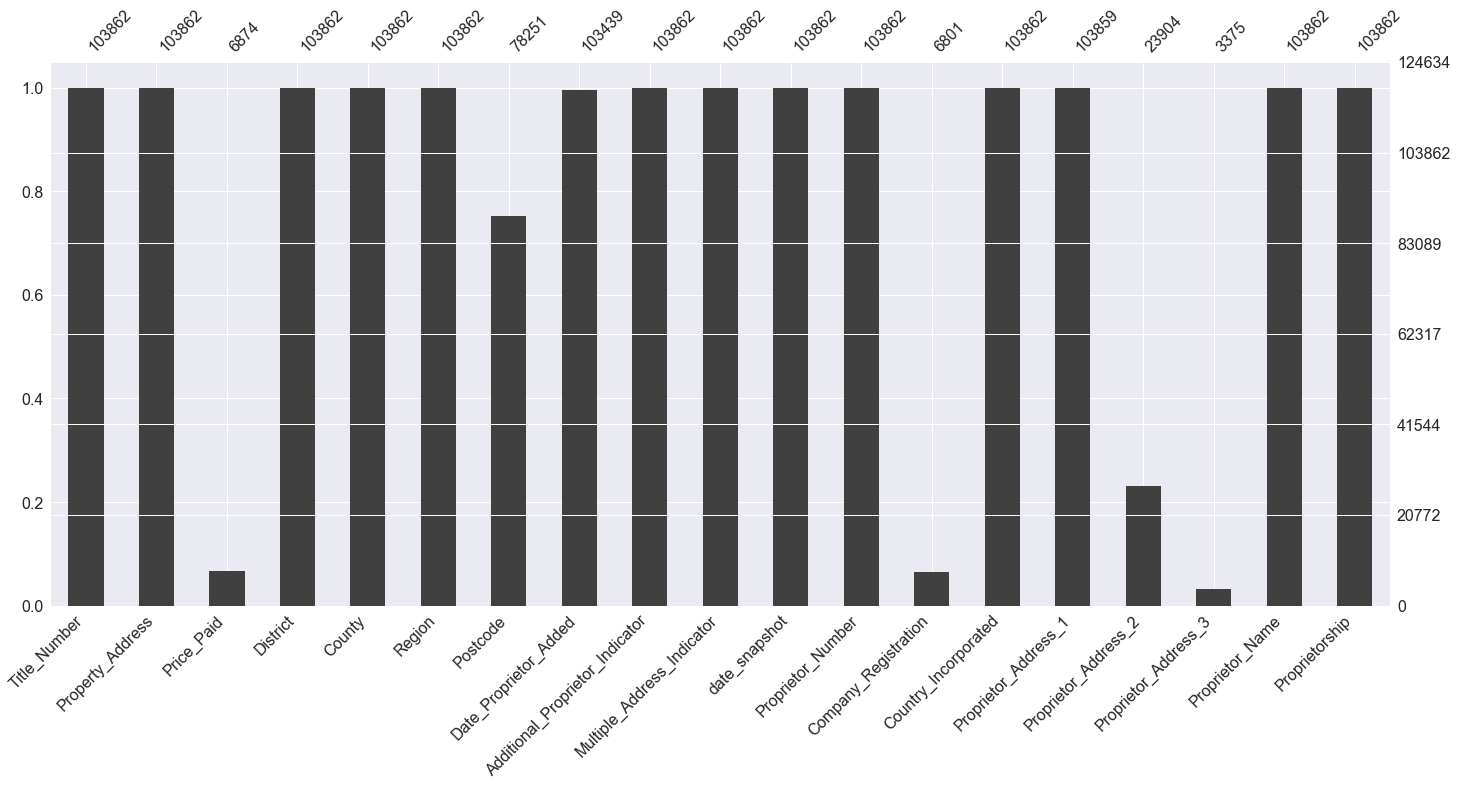

In [53]:
mgno.bar(data_2015)

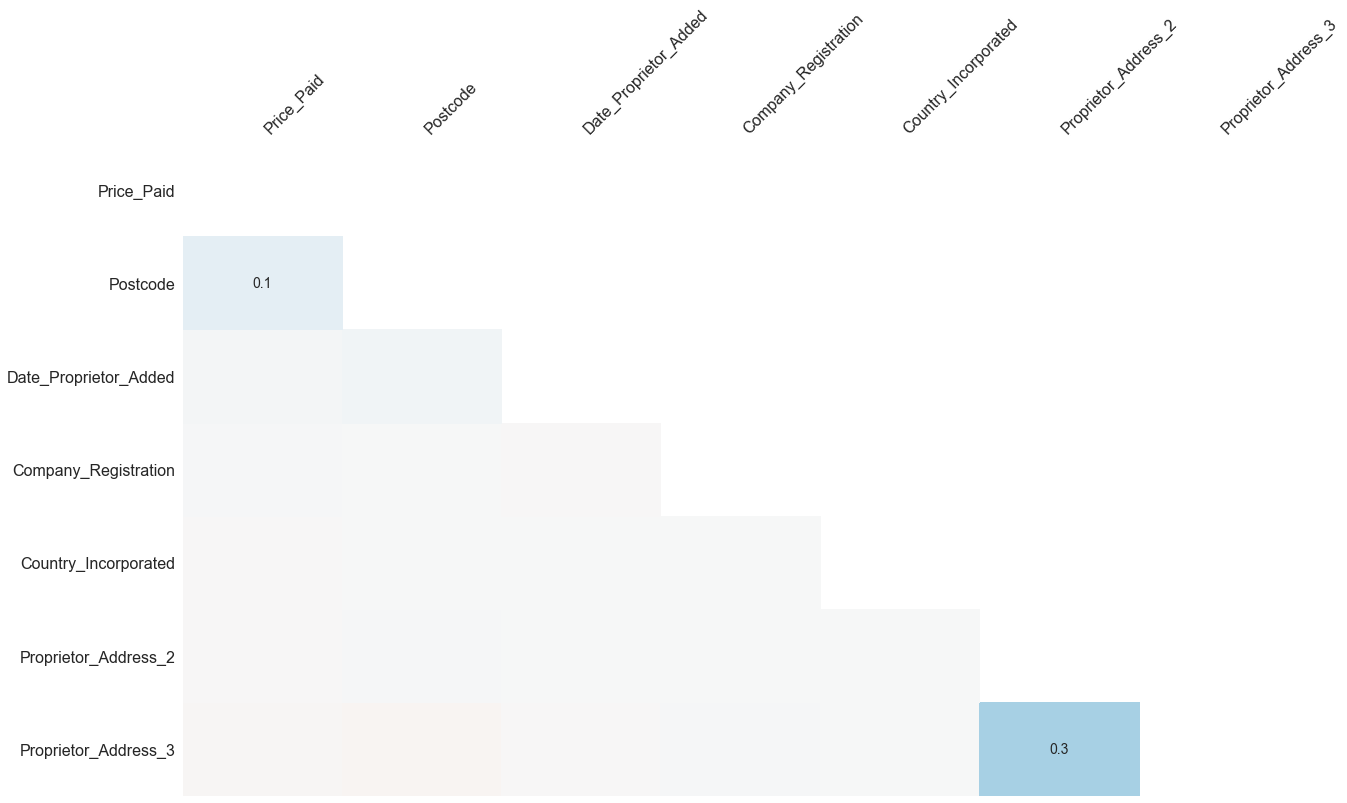

In [85]:
##Correlation matrix for filled values
mgno.heatmap(data)

In [94]:
##Format dates that proprietor was added
data['Date_Proprietor_Added'] = pd.to_datetime(data['Date_Proprietor_Added'])

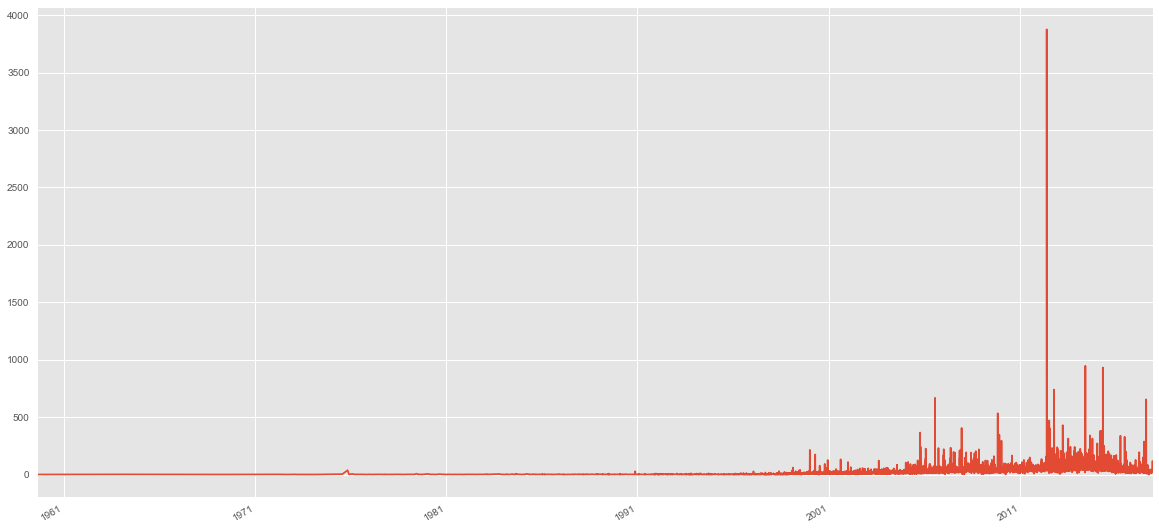

In [99]:
data['Date_Proprietor_Added'].value_counts().plot(figsize=(20,10))

## Geocode properties

# Data dictionary

Write a data dictionary for each field [TO DO]

# Analysis

How many UK properties are owned by offshore companies compared to 2015?
Offshore here is defined as...

In [100]:
##How many titles are held by overseas companies in 2015 and 2017?
data.groupby('date_snapshot').agg(lambda x: len(x.unique()))['Title_Number']

date_snapshot
2015-10-31    99344
2017-10-01    99219
Name: Title_Number, dtype: int64

How many are valued at >£1m? What’s the total amount? What’s the sq footage? Have these figures increased since July 2015?

How many properties owned by offshore companies are in London? Has this increased since 2015?

In [101]:
df = data.pivot_table(index='County',columns='date_snapshot',values='Title_Number',aggfunc=lambda x: len(x.unique()))\
.sort_values(by='2017-10-01 00:00:00',ascending=False)
df['pct_change'] = df.pct_change(axis=1)['2017-10-01']
df.head(10)

date_snapshot,2015-10-31 00:00:00,2017-10-01 00:00:00,pct_change
County,,,
GREATER LONDON,44022,43311,-0.016151
GREATER MANCHESTER,4988,4916,-0.014435
MERSEYSIDE,2675,2857,0.068037
WEST YORKSHIRE,2714,2568,-0.053795
WEST MIDLANDS,2293,2315,0.009594
SURREY,2195,2121,-0.033713
KENT,1785,1905,0.067227
ESSEX,1801,1822,0.011660
LANCASHIRE,1601,1574,-0.016864


Which areas of UK are most densely populated by buildings owned by anonymous companies? Has this changed since 2015?

In [102]:
df = data.pivot_table(index='Region',columns='date_snapshot',values='Title_Number',aggfunc=lambda x: len(x.unique()))\
.sort_values(by='2017-10-01 00:00:00',ascending=False)
df['pct_change'] = df.pct_change(axis=1)['2017-10-01']
df.head(10)

date_snapshot,2015-10-31 00:00:00,2017-10-01 00:00:00,pct_change
Region,,,
GREATER LONDON,44022,43311,-0.016151
SOUTH EAST,15701,15967,0.016942
NORTH WEST,10885,10977,0.008452
YORKS AND HUMBER,5589,5693,0.018608
SOUTH WEST,5508,5450,-0.010530
WEST MIDLANDS,5117,5168,0.009967
EAST MIDLANDS,4223,4381,0.037414
NORTH,3232,3170,-0.019183
WALES,2697,2672,-0.009270


Which political constituencies have the highest density of buildings owned by anonymous companies? Has this changed since 2015?

How many properties owned by offshore companies are in Kensington & Chelsea / City of Westminster / City of London? Has this increased since 2015?

In [103]:
df = data.pivot_table(index='District',columns='date_snapshot',values='Title_Number',aggfunc=lambda x: len(x.unique()))\
.sort_values(by='2017-10-01 00:00:00',ascending=False)
df['pct_change'] = df.pct_change(axis=1)['2017-10-01']
df.head(10)

date_snapshot,2015-10-31 00:00:00,2017-10-01 00:00:00,pct_change
District,,,
CITY OF WESTMINSTER,13139,11621,-0.115534
KENSINGTON AND CHELSEA,6741,6341,-0.059338
CAMDEN,2380,2490,0.046218
TOWER HAMLETS,1893,2086,0.101955
WANDSWORTH,1893,2020,0.067089
LAMBETH,1639,1768,0.078707
MANCHESTER,1510,1613,0.068212
HAMMERSMITH AND FULHAM,1540,1592,0.033766
LIVERPOOL,1249,1399,0.120096


What is the breakdown of company registration by jurisdiction? How does this compare to 2015?

In [144]:
df = data.pivot_table(index='Country_Incorporated',columns='date_snapshot',values='unique_company',aggfunc=lambda x: len(x.unique()))\
.sort_values(by='2017-10-01 00:00:00',ascending=False)
df['pct_change'] = df.pct_change(axis=1)['2017-10-01']
df.head(20)

date_snapshot,2015-10-31 00:00:00,2017-10-01 00:00:00,pct_change
Country_Incorporated,,,
BRITISH VIRGIN ISLANDS,16930.0,16507.0,-0.024985
JERSEY,9139.0,8676.0,-0.050662
ISLE OF MAN,6593.0,6281.0,-0.047323
GUERNSEY,5019.0,4982.0,-0.007372
PANAMA,1676.0,1477.0,-0.118735
GIBRALTAR,1379.0,1315.0,-0.046410
LUXEMBOURG,1058.0,1202.0,0.136106
SEYCHELLES,1031.0,1099.0,0.065955
HONG KONG,772.0,926.0,0.199482


How many are owned by companies registered in the British Crown Dependencies and Overseas Territories? Has this changed since 2015?